<a href="https://colab.research.google.com/github/luiscascelli/libpythonpro/blob/master/Desafio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas basicas
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#importando o nosso dataset
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


In [ ]:
#lendo o dataset para o formato de dataframe
df_wine=pd.read_csv("winequality-red.csv",sep=';')

In [ ]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_wine.shape

(1599, 12)

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


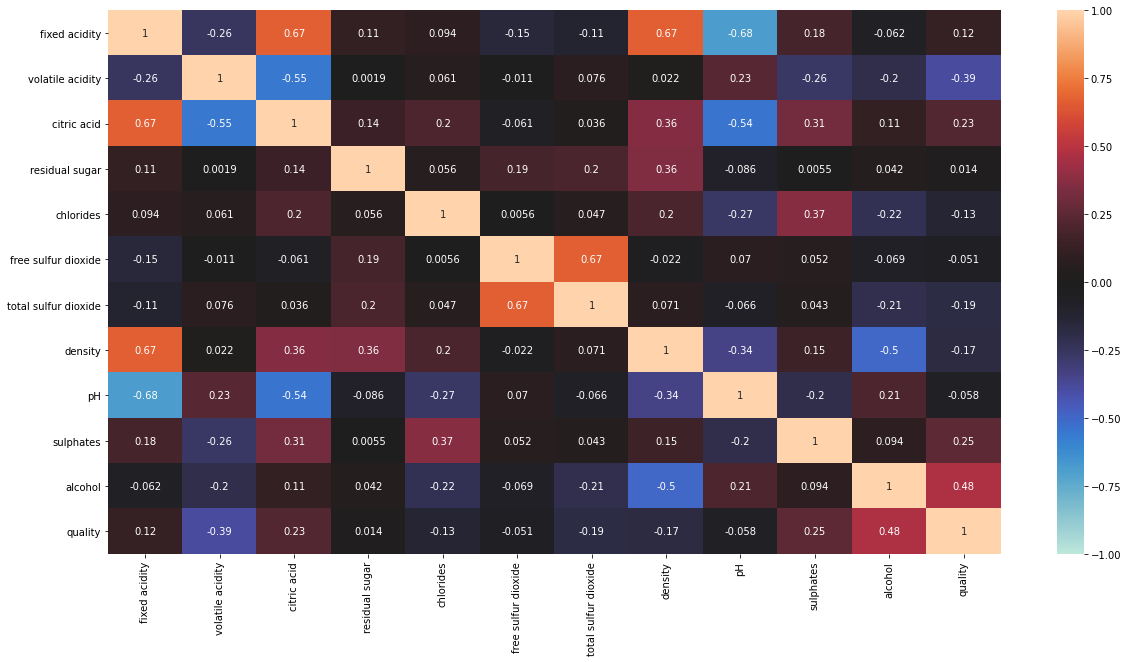

In [ ]:
plt.figure(figsize=(20, 10))
matriz_corr = df_wine.corr() #constroi a matriz de correlação
sns.heatmap(matriz_corr, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [ ]:
df_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
colunas = list(df_wine.columns)

In [ ]:
x = df_wine[colunas[:-1]]
y = df_wine[colunas[-1]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler  #aplicando a normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))  #define o intervalor entre 0 e 1 para os dados serem normalizados
scaler.fit(x)
x_norm = scaler.fit_transform(x)

In [ ]:
x['fixed acidity'].min()

4.6

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.30, random_state=1)

In [ ]:
#Modelo KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [ ]:
#testa a acuracia
from sklearn.metrics import accuracy_score
acuracia_knn = accuracy_score(y_pred, y_test)

print('Acurácia do KNN', acuracia_knn)

Acurácia do KNN 0.5645833333333333


In [ ]:
#Modelo Decision Tree
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()
# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)
#Realiza a previsão de classificaçao 
y_predt = clf.predict(X_test)

In [ ]:
#testa a acuracia
acuracia_dt = accuracy_score(y_predt, y_test)

print('Acurácia do Decision Tree', acuracia_dt)

Acurácia do Decision Tree 0.6


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_predrf = rf_clf.predict(X_test)

In [ ]:
#testa a acuracia
acuracia_rf = accuracy_score(y_predrf, y_test)

print('Acurácia do Random Forest', acuracia_rf)

Acurácia do Random Forest 0.6833333333333333


In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
#cria o objeto SVM
clf_svm = SVC(gamma='auto')  #escolhe o  kernel automaticamente
#realiza a classificação via SVM
clf_svm.fit(X_train,y_train)
#Realiza a previsão de classificaçao 
y_predsvm = clf_svm.predict(X_test)

In [ ]:
#testa a acuracia
acuracia_svm = accuracy_score(y_predsvm, y_test)

print('Acurácia do SVM', acuracia_svm)

Acurácia do SVM 0.5854166666666667


In [ ]:
#Rede MLP - MiltiLayer Perception
from sklearn.neural_network import MLPClassifier
#define a configuração da rede
clf_mlp = MLPClassifier()
#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)
#realiza a previsão
y_predmlp=clf_mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#testa a acuracia
acuracia_mlp = accuracy_score(y_predmlp, y_test)

print('Acurácia do MLP', acuracia_mlp)

Acurácia do MLP 0.6


In [ ]:
y_norm = y
for i in range(len(y_norm)):
  if y_norm[i] > 5:
    y_norm[i] = 1
  else:
    y_norm[i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#Ramdom Forest com y_norm
X_train, X_test, ynorm_train, ynorm_test = train_test_split(x_norm, y_norm, test_size=0.30, random_state=1)
rf_clf.fit(X_train, ynorm_train)
ynorm_predrf = rf_clf.predict(X_test)


In [ ]:
#testa a acuracia
acuracia_rfnorm = accuracy_score(ynorm_predrf, ynorm_test)

print('Acurácia do RF normalizado', acuracia_rfnorm)

Acurácia do RF normalizado 0.8208333333333333
